In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
wt = np.random.normal(0, 1, 500)

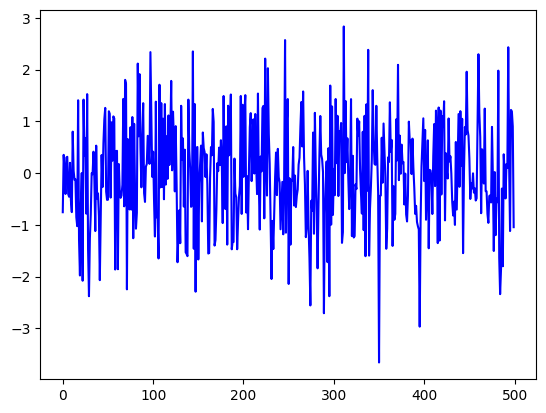

In [3]:
plt.plot(wt, color = 'b')
plt.show()

In [4]:
def Moving_average(D):
    L = []
    n = len(D)
    for t in range(1, n-1): # t=1,2,.....,n-2
        vt = np.mean(D[t-1:t+2]) #t-1, t, t+1
        L.append(vt)
    plt.plot(L)
    plt.show()

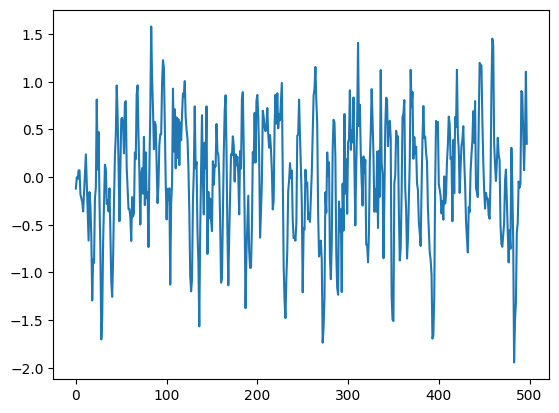

In [5]:
Moving_average(wt)

In [6]:
def MA(D, m): # m = odd number
    L = []
    n = len(D)
    mm = int(m/2)
    for t in range(mm, n-mm):
        vt = np.mean(D[t-m:t+mm+1]) # if m=15, mm=7, t-7,t-6,....t,...t+7
        L.append(vt)
    plt.plot(L)
    plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


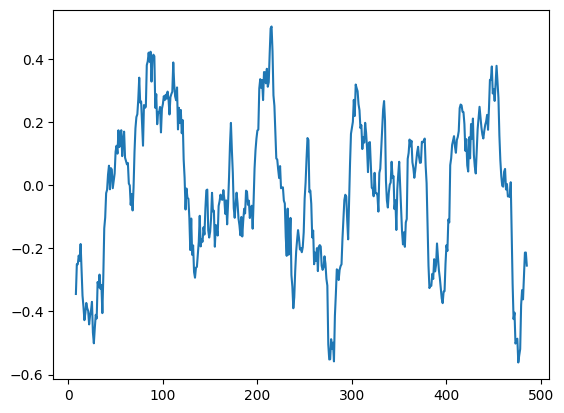

In [7]:
MA(wt, 15)

In [8]:
def AR_1(phi0, phi1, n): #xt = phi0 + phi1*x_{t-1} + wt
    L = []
    x0 = 0 #초기값
    for t in range(n):
        xt = phi0 + phi1*x0 + wt[t]
        L.append(xt)
        x0 = xt
    plt.plot(L)
    plt.show()
    return L

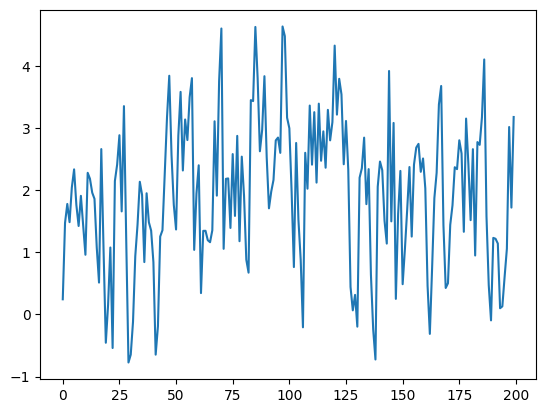

[0.24411615698829792,
 1.474195226730372,
 1.7793228822339189,
 1.4862085494305677,
 2.044268047316348,
 2.336278148065671,
 1.7639088046811588,
 1.4246169808943159,
 1.9100742774948176,
 1.4306537359242575,
 0.9613356230090485,
 2.280827188788818,
 2.1847609659142857,
 1.961033065474339,
 1.8617584103165101,
 1.0773636621680223,
 0.5132112906436084,
 2.662893221560971,
 1.0441367973822326,
 -0.45541809715237824,
 0.15543389090955706,
 1.078232850633386,
 -0.5400114878609581,
 2.1486437080228553,
 2.4139835599856863,
 2.8859532273072714,
 1.6594972768550076,
 3.3542698447037216,
 1.2094972948238132,
 -0.7730169684452615,
 -0.6469415942442891,
 -0.11816357115960308,
 0.9388759242019603,
 1.4468283030716922,
 2.136521799938573,
 1.9259782793950466,
 0.8433443346646052,
 1.951394628546415,
 1.4842040422266618,
 1.3498825088824518,
 0.8416295855737868,
 -0.6470105808085531,
 -0.18927179454602372,
 1.2543121982678374,
 1.3567337709860787,
 2.2592954308708886,
 3.16978443505943,
 3.843552359

In [9]:
AR_1(1, 0.5, 200)

In [10]:
def AR_2(phi0, phi1, phi2, n):
    L = []
    x0, x1 = 0, 0
    for t in range(n):
        xt = phi0 + phi1 + phi2*x0 + wt[t]
        L.append(xt)
        x0 = x1
        x1 = xt
    plt.plot(L)
    plt.show()

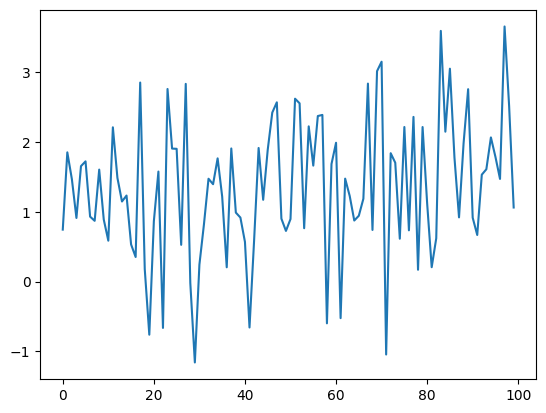

In [11]:
AR_2(1, 0.5, -0.1, 100)

In [12]:
def RandomWalk(d, n):
    L = []
    x0 = 0
    for t in range(n):
        xt = d + x0 + wt[t]
        L.append(xt)
        x0 = xt
    plt.plot(L)

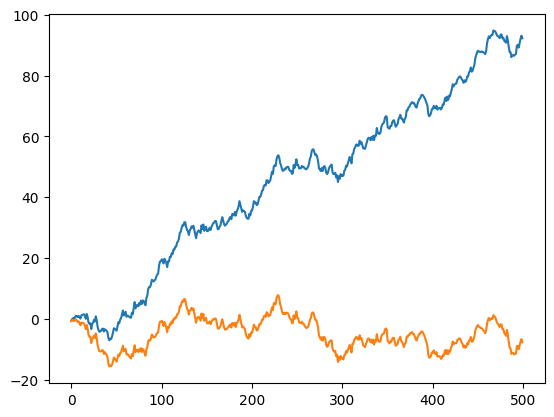

In [13]:
RandomWalk(0.2, 500)
RandomWalk(0, 500)
plt.show()

In [14]:
def COS(n, s): # 2cos(2pi t/50) + wt  <--- sd = s
    t = np.linspace(0, n, n+1) # 0,1,2,....,n
    y1 = 2*np.cos(2*np.pi*t/50)
    y2 = y1+np.random.normal(0, s, n+1)
    plt.plot(y1, 'red')
    plt.plot(y2, 'c')
    plt.show()

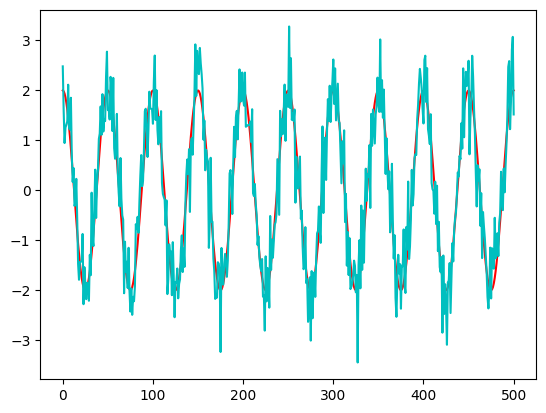

In [15]:
COS(500, 0.5)

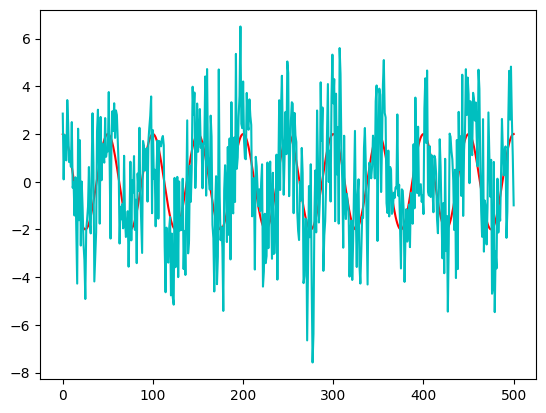

In [16]:
COS(500, 2)

In [17]:
#시계열 필기 13page 예제
import random

def HT(n):
    L1, Lx = [], []
    for t in range(n):
        if random.randint(0, 1) == 0:
            L1.append("H")
            Lx.append(1)
        else:
            L1.append("T")
            Lx.append(-1)
    return L1, Lx

In [18]:
HT(10)

(['T', 'H', 'T', 'H', 'T', 'H', 'T', 'T', 'T', 'H'],
 [-1, 1, -1, 1, -1, 1, -1, -1, -1, 1])

In [19]:
def Joint_xy(n): # yt = 5 + xt -0.7x_{t-1}
    xt = HT(n)[1]
    x0 = -1
    yt0 = 5 + xt[0] -0.7*x0
    Ly = [yt0]
    for t in range(1, n): # t=1, ..., n-1
        yt_t = 5 + xt[t] -0.7*xt[t-1]
        Ly.append(yt_t)
    return xt, Ly

In [20]:
#Generate {(xt,yt) : t = 1,2,…,n} for n = 10,100,400.
#b번답
x10, y10 = Joint_xy(10)
print(x10, y10)
x100, y100 = Joint_xy(100)
x400, y400 = Joint_xy(400)

[1, 1, 1, 1, -1, -1, -1, 1, 1, -1] [6.7, 5.3, 5.3, 5.3, 3.3, 4.7, 4.7, 6.7, 5.3, 3.3]


In [21]:
def AutoCov(yD): #yD=y10,y100,y400
    L = []
    y = yD
    n = len(y)
    mu = np.mean(y)
    for h in range(0, 6):
        Lh = []
        for t in range(0, n-h):
            ac = (y[t+h]-mu)*(y[t]-mu)
            Lh.append(ac)
        autocov_h = sum(Lh)/n
        L.append(autocov_h)
    return L

In [22]:
AutoCov(y10)

[1.2064000000000006,
 0.023039999999999984,
 -0.29872000000000004,
 -0.2540800000000001,
 -0.2454400000000001,
 0.28720000000000007]

In [23]:
AutoCov(y100)

[1.6226039999999993,
 -0.964645960000001,
 0.25766008,
 0.007686120000000023,
 -0.08397183999999994,
 0.08717019999999998]

In [24]:
AutoCov(y400)

[1.4338897500000019,
 -0.5902722756250001,
 -0.11940830125000013,
 0.03376392312499982,
 0.01342289750000014,
 -0.07316562812500013]

In [25]:
def SACF(yD):
    Autocov = AutoCov(yD)
    SACF = Autocov/Autocov[0]
    return SACF

In [26]:
SACF(y10)

array([ 1.        ,  0.01909814, -0.24761273, -0.21061008, -0.20344828,
        0.23806366])

In [32]:
def CrossCov(xD, yD):
    L = []
    n = len(xD)
    x, y = xD, yD
    mu_x, mu_y = np.mean(x), np.mean(y)
    for h in range(-3, 4): #h = -3, -2, -1, 0, 1, 2, 3
        Lc_h = []
        if h < 0: # h = -3, -2, -1
            hh = np.abs(h) #hh = 3, 2, 1
            for t in range(0, n-hh):
                cc = (y[t+hh]-mu_y)*(x[t]-mu_x) # gamma_xy(-hh) = gamma_yx(hh)
                Lc_h.append(cc)
        else: #h = 0, 1, 2, 3
            for t in range(0, n-h):
                cc = (x[t+h]-mu_x)*(y[t]-mu_y)
                Lc_h.append(cc)
        ccov_h = sum(Lc_h) / n
        L.append(ccov_h)
    return L

In [33]:
def SCCF(xD, yD):
    ccov = np.array(CrossCov(xD, yD))
    print(ccov[3])
    Ccf = ccov/ccov[3]
    return Ccf

In [34]:
SCCF(x100, y100)
SCCF(x400, y400)

1.0493600000000003
0.9716324999999999


array([ 0.03525741, -0.10118727, -0.67540034,  1.        ,  0.09199114,
       -0.06143716, -0.00771666])